In [76]:
# import module from sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

In [77]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [78]:
# assign data and label to variables
df_x = diabetes.data
df_y = diabetes.target
print(df_x.shape, df_y.shape)

(442, 10) (442,)


In [79]:
X = np.array(df_x)
y = np.array(df_y)

In [80]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [81]:
# looking at shape, X has 10 features/columns and W should follow the same
W = np.random.rand(10)
b = np.random.rand()

In [90]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def mse(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = mse(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [99]:
learning_rate = 0.0001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW # W = W - learning rate * dw
    b -= learning_rate * db # b = b - learning rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3341.0640
Iteration 20 : Loss 3340.8668
Iteration 30 : Loss 3340.6697
Iteration 40 : Loss 3340.4727
Iteration 50 : Loss 3340.2758
Iteration 60 : Loss 3340.0790
Iteration 70 : Loss 3339.8824
Iteration 80 : Loss 3339.6859
Iteration 90 : Loss 3339.4895
Iteration 100 : Loss 3339.2932
Iteration 110 : Loss 3339.0970
Iteration 120 : Loss 3338.9009
Iteration 130 : Loss 3338.7050
Iteration 140 : Loss 3338.5092
Iteration 150 : Loss 3338.3134
Iteration 160 : Loss 3338.1178
Iteration 170 : Loss 3337.9224
Iteration 180 : Loss 3337.7270
Iteration 190 : Loss 3337.5317
Iteration 200 : Loss 3337.3366
Iteration 210 : Loss 3337.1415
Iteration 220 : Loss 3336.9466
Iteration 230 : Loss 3336.7518
Iteration 240 : Loss 3336.5571
Iteration 250 : Loss 3336.3626
Iteration 260 : Loss 3336.1681
Iteration 270 : Loss 3335.9738
Iteration 280 : Loss 3335.7795
Iteration 290 : Loss 3335.5854
Iteration 300 : Loss 3335.3914
Iteration 310 : Loss 3335.1975
Iteration 320 : Loss 3335.0038
Iteration 330 : L

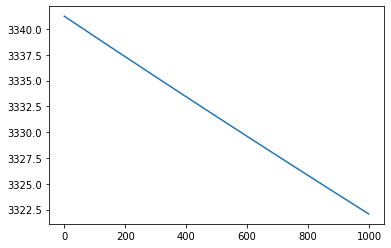

In [100]:
plt.plot(losses)
plt.show()

In [85]:
print(W, b)

[ 2.18415143  0.66376371 12.94362253  9.51273638  5.63482625  4.65480595
 -6.50527553  8.40943781 11.44683689  7.40385381] 27.39484680439519


In [88]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

5334.27629536224